<a href="https://colab.research.google.com/github/ndb7967/python_bootcamp/blob/main/codes/basic_machine_learning_methods_for_medical_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>기본적인 기계학습 알고리즘을 활용한 의료 X-ray 이미지 분류</b>

* 한 장의 의료 X-ray 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞히는 <b>분류 모델</b>을 만드는 것이 목표입니다.
* 다음의 두 가지 기본적인 기계학습 알고리즘을 실습합니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 본 프로젝트는 <b>총 8개의 단계</b>를 천천히 해결하는 방식으로 진행됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 <b>분류 모델</b>을 학습하는 기본적인 방법을 이해할 수 있습니다.

#### <b>Step 1. 데이터셋 다운로드 및 분석하기</b>

* [Medical MNIST 데이터셋 저장소](https://github.com/ndb7967/python_bootcamp/datasets/MedicalMNIST)
    * <b>참고</b>: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/datasets/andrewmvd/medical-mnist)
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb7967/python_bootcamp
# 폴더 안으로 이동
%cd python_bootcamp/datasets/MedicalMNIST
</pre>

In [ ]:
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb7967/python_bootcamp
# 폴더 안으로 이동
%cd python_bootcamp/datasets/MedicalMNIST

Cloning into 'python_bootcamp'...
remote: Enumerating objects: 58557, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 58557 (delta 1), reused 0 (delta 0), pack-reused 58549
Receiving objects: 100% (58557/58557), 80.84 MiB | 29.95 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Checking out files: 100% (58969/58969), done.
/content/python_bootcamp/datasets/MedicalMNIST


#### <b>(알아보기) 데이터셋 설명</b>

* Medical MNIST 데이터셋은 58,954개의 다양한 의료 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
0. 복부 CT (Abdomen CT)
1. 유방 MRI (Breast MRI)
2. 흉부 X-ray (Chest X-Ray)
3. 흉부 CT (Chest CT)
4. 손 X-ray (Hand X-Ray)
5. 손 CT (Hand CT)
</pre>

* 각 이미지는 64 X 64 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
MedicalMNIST/
    train/ # 학습 이미지가 담긴 폴더입니다.
        AbdomenCT/
        BreastMRI/
        ChestCT/
        CXR/
        Hand/
        HeadCT/
    test/ # 테스트 이미지가 담긴 폴더입니다.
        AbdomenCT/
        BreastMRI/
        ChestCT/
        CXR/
        Hand/
        HeadCT/
</pre>

#### <b>(알아보기) 학습 이미지 확인 방법</b>

* 학습할 데이터셋을 확인합니다.
* os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 전체 파일 이름들을 확인할 수 있습니다.

In [ ]:
import os


# 전체 클래스 이름 확인하기
directory_list = os.listdir('train/')
class_names = []
for directory in directory_list:
    class_names.append(directory)

print(class_names)

['AbdomenCT', 'CXR', 'ChestCT', 'BreastMRI', 'Hand', 'HeadCT']


In [ ]:
# 학습 이미지 확인하기
train_list = []

for label in range(len(class_names)):
    file_list = os.listdir("train/" + class_names[label])
    for file_name in file_list:
        path = "train/" + class_names[label] + "/" + file_name
        train_list.append((path, label))

# 테스트 이미지 확인하기
test_list = []

for label in range(len(class_names)):
    file_list = os.listdir("test/" + class_names[label])
    for file_name in file_list:
        path = "test/" + class_names[label] + "/" + file_name
        test_list.append((path, label))

print("학습 이미지의 개수:", len(train_list))
print("테스트 이미지의 개수:", len(test_list))

학습 이미지의 개수: 52954
테스트 이미지의 개수: 6000


* pandas 라이브러리를 사용하여 전체 데이터의 구성을 <b>데이터 프레임(data frame)</b> 형태로 기록합니다.

In [ ]:
import pandas as pd

train_dataframe = pd.DataFrame(data=train_list, columns=["path", "label"])

print('학습 이미지의 개수:', len(train_dataframe))
print('학습 이미지별 클래스 정보')
train_dataframe.head()

학습 이미지의 개수: 52954
학습 이미지별 클래스 정보


,path,label
0,train/AbdomenCT/005542.jpeg,0
1,train/AbdomenCT/007311.jpeg,0
2,train/AbdomenCT/001654.jpeg,0
3,train/AbdomenCT/002892.jpeg,0
4,train/AbdomenCT/002680.jpeg,0


In [ ]:
test_dataframe = pd.DataFrame(data=test_list, columns=["path", "label"])

print('테스트 이미지의 개수:', len(test_dataframe))
print('테스트 이미지별 클래스 정보')
test_dataframe.head()

테스트 이미지의 개수: 6000
테스트 이미지별 클래스 정보


,path,label
0,test/AbdomenCT/009921.jpeg,0
1,test/AbdomenCT/009541.jpeg,0
2,test/AbdomenCT/009130.jpeg,0
3,test/AbdomenCT/009891.jpeg,0
4,test/AbdomenCT/009283.jpeg,0


#### <b>Step 2. 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 학습 이미지의 개수를 구하세요.
    * pandas 라이브러리의 데이터프레임(DataFrame)을 이용하면 매우 간단한 코드로 구현할 수 있습니다.
    * 예를 들어 label 컬럼(column)의 값이 3인 데이터의 개수는 다음과 같이 확인 가능합니다.
    * 참고: [pandas의 활용](https://www.youtube.com/watch?v=5ZiP4HRFBqU)

<pre>
my_frame[my_frame.label == 3]
</pre>

* 총 학습 이미지의 수는 52954개, 클래스의 개수는 6개입니다.
* <b>클래스 0</b>: 9000
* <b>클래스 1</b>: 9000
* <b>클래스 2</b>: 9000
* <b>클래스 3</b>: 7954
* <b>클래스 4</b>: 9000
* <b>클래스 5</b>: 9000

클래스 0의 개수: 9000
클래스 1의 개수: 9000
클래스 2의 개수: 9000
클래스 3의 개수: 7954
클래스 4의 개수: 9000
클래스 5의 개수: 9000


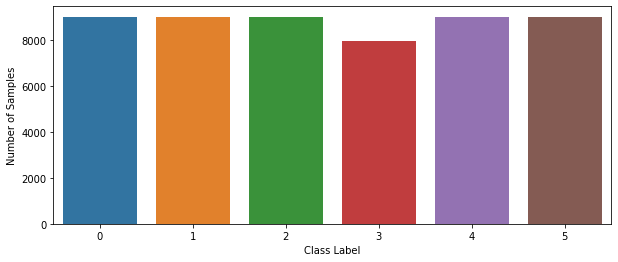

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 6.0) # 그림의 기본 크기 설정

# 각 클래스별 개수 출력
print('클래스 0의 개수:', len(train_dataframe[train_dataframe.label == 0]))
print('클래스 1의 개수:', len(train_dataframe[train_dataframe.label == 1]))
print('클래스 2의 개수:', len(train_dataframe[train_dataframe.label == 2]))
print('클래스 3의 개수:', len(train_dataframe[train_dataframe.label == 3]))
print('클래스 4의 개수:', len(train_dataframe[train_dataframe.label == 4]))
print('클래스 5의 개수:', len(train_dataframe[train_dataframe.label == 5]))

# 각 클래스에 따른 학습 이미지의 개수를 출력하기
fig, ax = plt.subplots(figsize = (10, 4)) # 그림 크기 설정
sns.countplot(x ='label', data=train_dataframe)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show() 

#### <b>(알아보기) 특정한 이미지를 불러와 화면에 출력하기</b>

* PIL 라이브러리로 특정한 경로의 이미지를 불러와 numpy 객체로 만들 수 있습니다.

<pre>
img = np.asarray(Image.open(이미지 경로))
</pre>

* Numpy 객체는 matplotlib를 이용해 간단히 시각화할 수 있습니다.

<pre>
plt.imshow(img)
plt.show()
</pre>

* 원본 이미지의 크기가 너무 크므로, 모든 이미지를 32 X 32 X 1의 크기로 변경합니다.

이미지의 해상도: (32, 32)


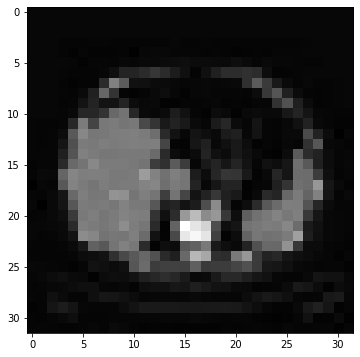

In [ ]:
from skimage.transform import resize
from PIL import Image
import numpy as np


img = Image.open(train_dataframe.iloc[0].path)
img = np.asarray(img)
img = resize(img, (32, 32))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img, cmap="gray")
plt.show()

#### <b>(알아보기) 학습/검증 데이터셋 나누는 방법</b>

* sklearn 라이브러리의 train_test_split()을 이용해 학습/검증 데이터셋을 구분합니다.
* 학습 이미지 데이터를 8:2의 비율로 학습(training)과 검증(validation) 데이터로 구분합니다.
* train_test_split() 함수의 주요 파라미터는 다음과 같습니다.
    * <b>test_size</b>: 테스트 데이터셋의 비율(default = 0.25)
    * <b>train_size</b>: 학습 데이터셋의 비율(default = 1 - test_size)
    * <b>shuffle</b>: 데이터를 분할할 때 자동으로 데이터 섞기(shuffle)를 수행합니다.

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(train_dataframe, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 42363
검증 데이터셋 크기: 10591


#### <b>Step 3. 학습/검증 데이터셋 구성하기</b>

* 이미지는 별도의 폴더 안에 존재합니다.
* 모든 이미지를 읽어 와 <b>전체 이미지 데이터를 Numpy 객체로 구성</b>할 필요가 있습니다.
* 다음과 같이 X_train, y_train, X_val, y_val, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (42363, 32, 32)
    * <b>y_train</b>: (42363,)
    * <b>X_val</b>: (10591, 32, 32)
    * <b>y_val</b>: (10591,)
    * <b>X_test</b>: (6000, 32, 32)
    * <b>y_test</b>: (6000,)
* <b>(힌트)</b> train_dataset의 image_name 컬럼과 label 컬럼을 한 줄에 하나씩 출력하는 방법은 다음과 같습니다.
    * 참고로 순서(index) 값 자체는 0부터 시작하지 않습니다.

<pre>
for index, row in train_dataset.iterrows():
    print(index, row['image_name'], row['label'])
</pre>

In [ ]:
import time


######### 학습 데이터셋 #########
start_time = time.time() # 시작 시간

# 학습 데이터셋 구성하기
X_train = []
y_train = []

# 데이터 정보를 하나씩 확인하며
for index, row in train_dataset.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])
    img = np.asarray(img)
    img = resize(img, (32, 32))
    X_train.append(img)
    y_train.append(row['label']) # 레이블 정보를 배열에 담기

X_train = np.asarray(X_train) # Numpy 객체로 변환
y_train = np.asarray(y_train) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 96.97822523117065


In [ ]:
######### 검증 데이터셋 #########
start_time = time.time() # 시작 시간

# 검증 데이터셋 구성하기
X_val = []
y_val = []

# 데이터 정보를 하나씩 확인하며
for index, row in val_dataset.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])
    img = np.asarray(img)
    img = resize(img, (32, 32))
    X_val.append(img)
    y_val.append(row['label']) # 레이블 정보를 배열에 담기

X_val = np.asarray(X_val) # Numpy 객체로 변환
y_val = np.asarray(y_val) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 24.470335483551025


In [ ]:
######### 테스트 데이터셋 #########
start_time = time.time() # 시작 시간

# 테스트 데이터셋 구성하기
X_test = []
y_test = []

# 데이터 정보를 하나씩 확인하며
for index, row in test_dataframe.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])
    img = np.asarray(img)
    img = resize(img, (32, 32))
    X_test.append(img)
    y_test.append(row['label']) # 레이블 정보를 배열에 담기

X_test = np.asarray(X_test) # Numpy 객체로 변환
y_test = np.asarray(y_test) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 12.284029960632324


#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (42363, 32, 32)
학습 레이블: (42363,)
검증 이미지: (10591, 32, 32)
검증 레이블: (10591,)
테스트 이미지: (6000, 32, 32)
테스트 레이블: (6000,)
</pre>

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)
print('테스트 이미지:', X_test.shape)
print('테스트 레이블:', y_test.shape)

학습 이미지: (42363, 32, 32)
학습 레이블: (42363,)
검증 이미지: (10591, 32, 32)
검증 레이블: (10591,)
테스트 이미지: (6000, 32, 32)
테스트 레이블: (6000,)


#### <b>(알아보기) 데이터셋 시각화 방법</b>

* 학습 데이터셋에 포함된 이미지를 시각화합니다.
  * 데이터셋에서 각 클래스에 따른 일부 데이터를 시각화합니다.
* 각 클래스에 따른 이미지가 정확한지 확인합니다.
   * 예를 들어 Chest X-ray 컬럼에 있는 이미지는 전부 흉부 X-ray 이미지여야 합니다.

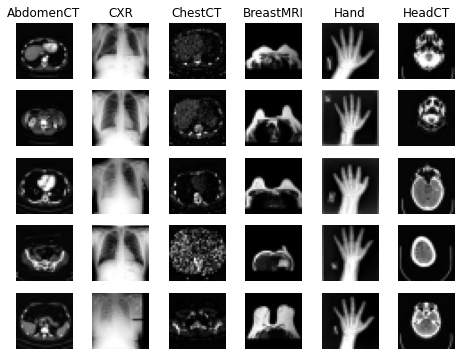

In [ ]:
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(X_data, y_data, class_names, samples_per_class):
    num_classes = len(class_names)
    for y, cls in enumerate(class_names): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_data == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_data[idx], cmap="gray")
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, y_train, class_names, samples_per_class)

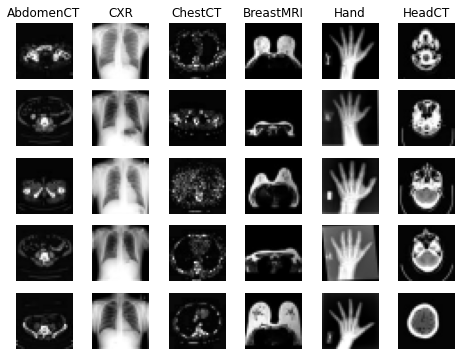

In [ ]:
visualize_data(X_val, y_val, class_names, samples_per_class)

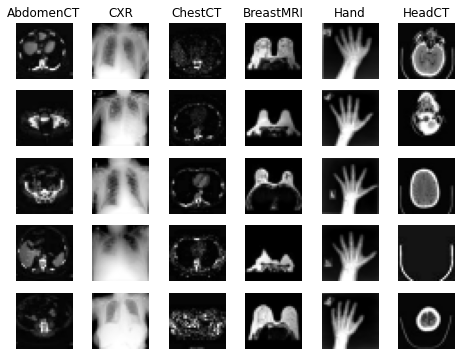

In [ ]:
visualize_data(X_test, y_test, class_names, samples_per_class)

#### <b>Step 4. 학습/검증 데이터셋 전처리</b>

* 선형 모델(linear model)을 학습할 예정이므로, 각 이미지를 벡터로 변경합니다.
* 다음과 같이 X_train, y_train, X_val, y_val, X_test, y_val 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (42363, 1024)
    * <b>y_train</b>: (42363,)
    * <b>X_val</b>: (10591, 1024)
    * <b>y_val</b>: (10591,)
    * <b>X_test</b>: (6000, 1024)
    * <b>y_test</b>: (6000,)
* 본 실습에서는 <b>데이터 정규화(normalization)</b>을 수행하지 않습니다.

In [ ]:
# 데이터 전처리(preprocessing)를 통해 각 이미지를 벡터로 변경합니다.
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (42363, 1024)
학습 레이블: (42363,)
검증 이미지: (10591, 1024)
검증 레이블: (10591,)
테스트 이미지: (6000, 1024)
테스트 레이블: (6000,)
</pre>

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)
print('테스트 이미지:', X_test.shape)
print('테스트 레이블:', y_test.shape)

학습 이미지: (42363, 1024)
학습 레이블: (42363,)
검증 이미지: (10591, 1024)
검증 레이블: (10591,)
테스트 이미지: (6000, 1024)
테스트 레이블: (6000,)


#### <b>(알아보기) Logistic Regression 라이브러리를 이용한 선형 분류 모델 학습 방법</b>

* sklearn.linear_model에서 제공하는 LogisticRegression을 이용합니다.
    * 참고: [LogisticRegression 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    * 기본적으로 GPU를 지원하지 않기 때문에, 학습 속도가 느릴 수 있습니다.
* LogisticRegression의 주요 파라미터는 다음과 같습니다.
    * <b>penalty</b>: 정규화(normalization) 목적으로 사용할 norm을 명시(default='l2')
    * <b>solver</b>: 최적화(optimization)을 진행할 때 사용할 알고리즘(default='lbfgs') 
    * <b>max_iter</b>: 수렴(convergence)을 위해 반복할 횟수(default=100)
    * <b>multi_class</b>: 클래스(class)의 개수가 여러 개인지 확인(default='auto')
    * <b>verbose</b>: 자세한 학습 결과를 표시할지의 여부(default=0)

* 예를 들어 10번의 반복(iteration)을 수행하여 학습하는 코드는 다음과 같습니다.

<pre>
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)
</pre>

* 너무 적은 횟수로 반복하여 수렴이 되지 않은 경우에는 다음과 같은 경고(warning) 메시지가 출력될 수 있습니다.
    * 이때 max_iter의 값을 증가시킴으로써 경고 메시지가 나오지 않도록 할 수 있습니다.
    * 생각해 보기: 완전히 수렴하도록 만드는 것이 성능 향상에 도움이 될까요?

<pre>
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
</pre>

In [ ]:
from sklearn.linear_model import LogisticRegression


start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 4.420735597610474


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <b>(알아보기) 학습된 모델의 정확도 계산 방법</b>

* 학습된 LogisticRegression 모델의 정확도를 평가합니다.
* accuracy_score 메서드를 이용할 수 있습니다.

In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.946934825201237
검증 데이터셋 정확도: 0.9413653101690114
클래스: [0 1 2 3 4 5]
반복 횟수: [10]
학습된 가중치 크기: (6, 1024)


#### <b>(알아보기) 개별 이미지에 대하여 판별 수행</b>

* 몇 개의 이미지에 대하여 판별을 수행한 결과를 출력할 수 있습니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

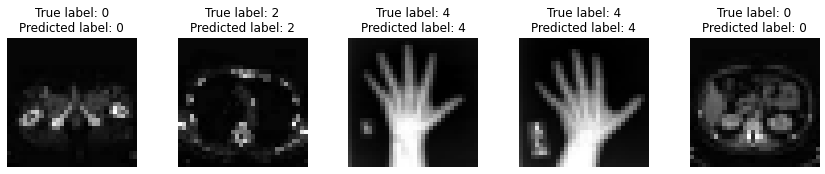

In [ ]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val[:max_cnt], y_val[:max_cnt], model.predict(X_val[:max_cnt])):
    ax.imshow(np.reshape(image, (32, 32)), cmap="gray") # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 혼동 행렬(confusion matrix)을 생성할 수 있습니다.
* 생각해 보기: 어떤 클래스에 대하여 가장 분류 정확도가 떨어지나요? 그 이유는 무엇이라고 생각하나요?

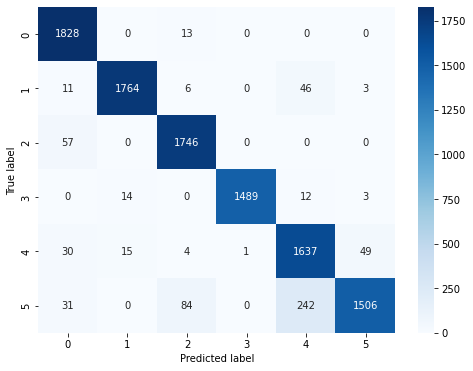

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#### <b>Step 5. Logistic Regression 모델의 성능 평가하기</b>

* 다음의 코드를 실행하여 실행 결과를 정리하세요.
    * 실행 결과는 매 번 달라질 수 있습니다.
* 반복 횟수가 100일 때
    * 학습 데이터셋 정확도: 99.559%
    * 검증 데이터셋 정확도: 99.245%
* 반복 횟수가 300일 때
    * 학습 데이터셋 정확도: 99.821%
    * 검증 데이터셋 정확도: 99.405%
* 반복 횟수가 500일 때
    * 학습 데이터셋 정확도: 99.811%
    * 검증 데이터셋 정확도: 99.416%
* 반복 횟수가 1000일 때
    * 학습 데이터셋 정확도: 99.804%
    * 검증 데이터셋 정확도: 99.416%

In [ ]:
from sklearn.linear_model import LogisticRegression


for iter in [100, 300, 500, 1000]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.9955857706017043
검증 데이터셋 정확도: 0.9924464167689547
소요된 시간(초 단위): 37.59995102882385


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.9982059816349172
검증 데이터셋 정확도: 0.9940515532055518
소요된 시간(초 단위): 109.6780514717102


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=500)]
학습 데이터셋 정확도: 0.9981115596157024
검증 데이터셋 정확도: 0.99414597299594
소요된 시간(초 단위): 176.9159219264984


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=1000)]
학습 데이터셋 정확도: 0.9980407431012912
검증 데이터셋 정확도: 0.99414597299594
소요된 시간(초 단위): 350.1773085594177


#### <b>(알아보기) 테스트 데이터 세트 정확도</b>

* 일반적으로 테스트 데이터 세트는 모델의 성능(정확도)을 최종 테스트할 때 한 번만 사용합니다.

In [ ]:
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('테스트 데이터셋 정확도:', test_acc)

테스트 데이터셋 정확도: 0.9935


#### <b>(알아보기) 데이터 증진(Data augmentation): Shift와 Flip</b>

* 데이터 증진 함수를 다음과 같이 구현할 수 있습니다.
    * <b>이동(shift)</b>: 이미지를 이동시킵니다.
    * <b>뒤집기(flip)</b>: 이미지를 상하 혹은 좌우 반전시킵니다.

In [ ]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((32, 32))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((32, 32))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

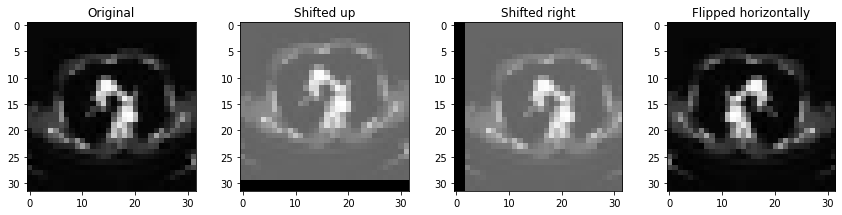

In [ ]:
# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(12, 4)
fig.tight_layout()

image = X_train[0]
shifted_image_up = shift_image(image, 0, -2)
shifted_image_right = shift_image(image, 2, 0)
flipped_image = horizontal_flip(image)

# 출력할 때는 이미지 해상도에 맞게 재변형
axes[0].imshow(np.reshape(image, (32, 32)), cmap="gray")
axes[0].set_title('Original')
axes[1].imshow(np.reshape(shifted_image_up, (32, 32)), cmap="gray")
axes[1].set_title('Shifted up')
axes[2].imshow(np.reshape(shifted_image_right, (32, 32)), cmap="gray")
axes[2].set_title('Shifted right')
axes[3].imshow(np.reshape(flipped_image, (32, 32)), cmap="gray")
axes[3].set_title('Flipped horizontally')

plt.show()

#### <b>Step 6. 데이터 전처리를 활용하여 선형 모델의 분류 성능 높이기</b>

* 마찬가지로 LinearRegression을 사용하는 상태에서, 데이터 전처리만 적용하여 성능을 높이는 방법을 찾아 보세요.
    * 데이터 증진(data augmentation)
    * (옵션) 데이터 정규화(normalization)
* LinearRegression에서 학습 횟수(max_iter)와 같은 파라미터는 자유롭게 변경해도 됩니다.
* <b>데이터 증진(data augmentation)</b> 적용 예시
    * 단, 아래 방식으로 데이터 증진을 과도하게 적용하는 경우에는 메모리 부족으로 세션이 다운될 수 있습니다.

<pre>
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
</pre>

* <b>(옵션) 데이터 정규화(data normalization)</b>
    * 원하는 경우 데이터 정규화를 적용할 수 있습니다.
    * 참고로 데이터 정규화를 적용하는 경우 검증(validation) 데이터에도 적용해야 합니다.

<pre>
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_val = scaler.transform(X_val)
</pre>

In [ ]:
import random


start_time = time.time() # 시작 시간

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)
    flipped_image = horizontal_flip(image)
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(flipped_image, dx, dy))
    y_train_augmented.append(label)

# 증진된 데이터들을 섞기(shuffle)
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print('데이터 증진 이전 데이터셋 크기:', X_train.shape)
print('데이터 증진 이후 데이터셋 크기:', X_train_augmented.shape)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

데이터 증진 이전 데이터셋 크기: (42363, 1024)
데이터 증진 이후 데이터셋 크기: (127089, 1024)
소요된 시간(초 단위): 21.593299865722656


In [ ]:
start_time = time.time() # 시작 시간

# (핵심) max_iter 값을 원하는 값으로 조절해보면서, 데이터 증진 코드 조금씩 바꾸어 보기
# 여러 차례 실험하면, 더 높은 검증 정확도(validation accuracy)를 얻을 수 있음 
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=70)
model.fit(X_train_augmented, y_train_augmented)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 88.42233228683472


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <b>(Hint) 학습 완료된 모델 확인하기</b>

In [ ]:
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.9867179692971068
검증 데이터셋 정확도: 0.9897082428477009
클래스: [0 1 2 3 4 5]
반복 횟수: [70]
학습된 가중치 크기: (6, 1024)


#### <b>Step 7. KNN 모델 평가 및 성능 높이기</b>

* 이번에는 KNN 모델을 이용하여 분류(classification)를 진행해 봅시다.
* 아래 소스 코드를 자유롭게 변형하여 <b>검증 정확도(validation accuracy)를 최대한으로 높이는 것이 목표</b>입니다.

1. <b>자신만의 거리 메트릭(metric)을 추가</b>해 보세요. 현재는 L1_distance(), L2_distance()만 존재합니다.
    * <b>(예시)</b> L1과 L2 거리(distance)를 섞은 나만의 거리 메트릭
2. 데이터 증진(data augmentation)을 포함해 다양한 기법을 자유롭게 적용해도 됩니다.
    * <b>(주의)</b> 메모리가 초과되면 세션이 다운될 수 있습니다.
* <b>내가 얻은 최고의 검증 정확도</b>: {답을 쓰세요.}

In [ ]:
from collections import Counter


class kNearestNeighbors(object):
    def __init__(self):
        pass

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def L1_distance(self, x):
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        return distances
    
    def L2_distance(self, x):
        distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        return distances

    def predict(self, X_val, k, distance):
        num_val = X_val.shape[0]
        y_pred = np.zeros((num_val), dtype=int)

        for i in range(num_val):
            shortest = []
            # 각 검증 이미지(i번째 이미지)마다 모든 학습 이미지와의 거리 계산
            if distance == 'L1':
                distances = self.L1_distance(X_val[i, :])
            if distance == 'L2':
                distances = self.L2_distance(X_val[i, :])
            min_indices = np.argsort(distances) # 가까운 학습 이미지 순으로 정렬
            for j in range(k): # 가장 가까운 k개의 학습 이미지의 인덱스를 확인해 레이블 정보 기록
                shortest.append(self.y_train[min_indices[j]])
            y_pred[i] = Counter(shortest).most_common(1)[0][0] # 가장 많이 등장한 레이블(label) 계산
        return y_pred

검증 데이터셋 정확도: 0.9897082428477009
소요된 시간(초 단위): 0.002949237823486328


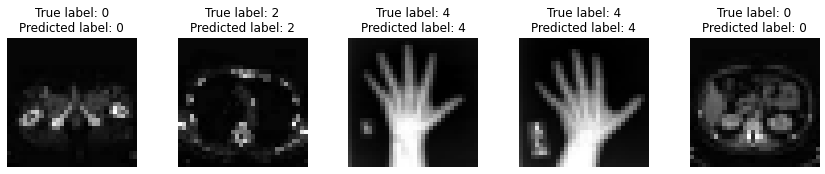

In [ ]:
start_time = time.time() # 시작 시간

knn = kNearestNeighbors()
knn.train(X_train, y_train)

# KNN 클래스(class) 코드를 적절히 수정한 뒤에 k 및 distance 값을 조절하여 검증 정확도를 최대한 높여 보세요.
# y_pred = knn.predict(X_val, k=7, distance='L2')
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val[:max_cnt], y_val[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (32, 32)), cmap="gray") # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 하이퍼 파라미터 찾기</b>

* distance와 k의 값을 적절히 조절하여 <b>가장 성능이 우수한 파라미터를 찾을 필요</b>가 있습니다.
* 전체 검증 데이터는 6,000개이므로 많은 시간이 소요될 수 있습니다.
    * 따라서 하이퍼 파라미터를 찾을 때는 200개의(일부의) 평가 데이터만 이용하는 것을 추천합니다.
    * 아래 코드는 k=7, 거리(distance) 메트릭으로는 L2를 사용한 코드 예시입니다.

검증 데이터셋 정확도: 1.0
소요된 시간(초 단위): 37.2809100151062


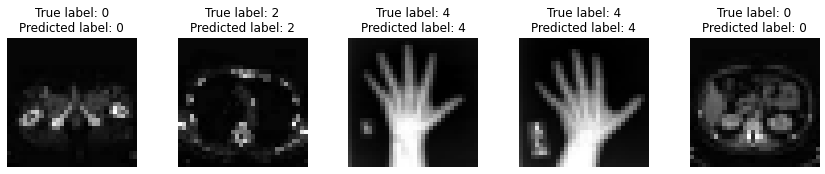

In [ ]:
start_time = time.time() # 시작 시간

knn = kNearestNeighbors()
knn.train(X_train, y_train)

number = 200
X_val_small = X_val[:number]
y_val_small = y_val[:number]

y_pred = knn.predict(X_val_small, k=7, distance='L2')
val_acc = accuracy_score(y_val_small, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (32, 32)), cmap="gray") # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 커스텀 데이터셋 찾기</b>

* 다양한 웹 사이트에서 데이터셋을 다운로드할 수 있습니다.
    * Roboflow 공공(public) 데이터셋: https://public.roboflow.com/classification
    * 캐글(Kaggle) 데이터셋: https://www.kaggle.com/datasets

* 다음과 같이 사이트에 방문하여 데이터셋을 둘러볼 수 있습니다.
* Roboflow에서는 Jupyter Notebook에서 바로 적용 가능한 데이터셋 다운로드 코드를 제공합니다.

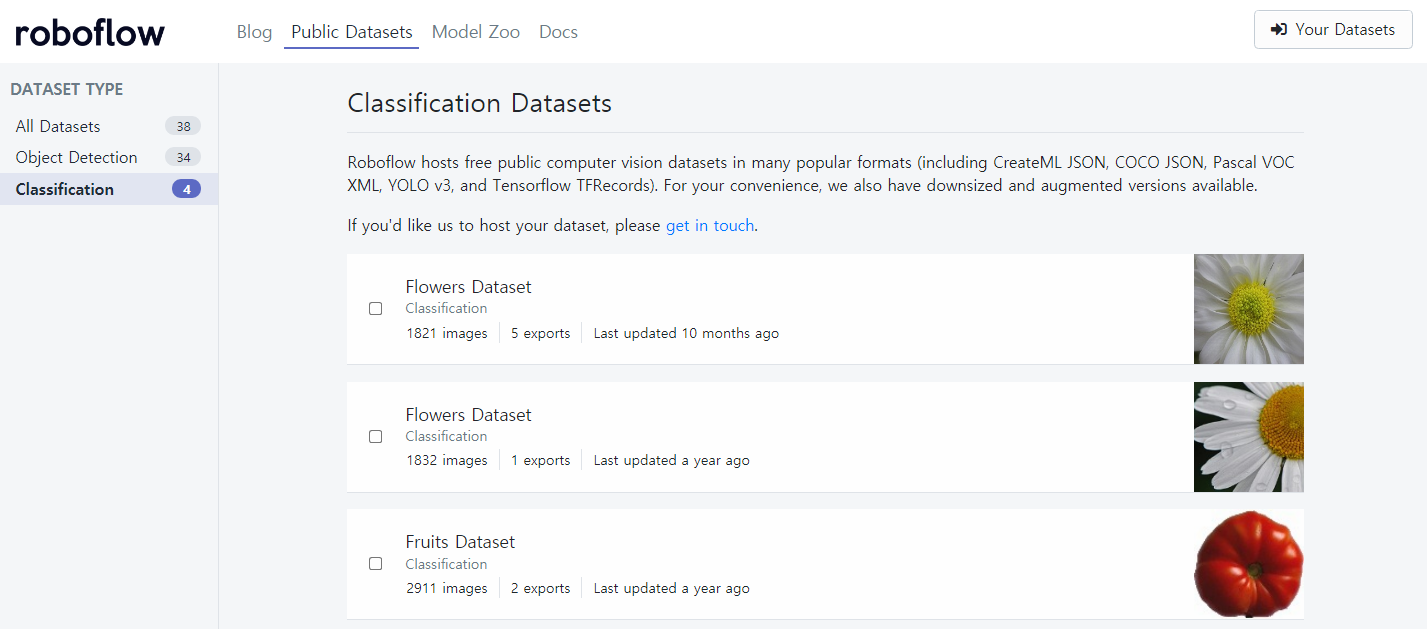

#### <b>Step 8. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.